In [ ]:
import pandas as pd

jumlah_sampah_per_bulan = data_sampah

# Konversi kolom tanggal menjadi tipe data datetime dengan format bulan/tanggal/tahun
jumlah_sampah_per_bulan['tanggal'] = pd.to_datetime(jumlah_sampah_per_bulan['tanggal'], format='%m/%d/%Y')

# Membuat kolom baru untuk mengelompokkan kolom tanggal berdasarkan bulan
jumlah_sampah_per_bulan['bulan'] = jumlah_sampah_per_bulan['tanggal'].dt.to_period('M')

# Mengelompokan bulan dan kecamatan, kemudian hitung jumlah sampah
grup_bulan_kecamatan = jumlah_sampah_per_bulan.groupby(['bulan', 'kecamatan']).agg({
    'jumlah_sampah': 'sum'
}).reset_index()

# Mencari kecamatan dengan jumlah sampah terbanyak di setiap bulan
max_sampah_bulan = grup_bulan_kecamatan.groupby('bulan')['jumlah_sampah'].idxmax()

# Ambil baris kecamatan dengan jumlah sampah terbanyak
kecamatan_terbanyak = grup_bulan_kecamatan.loc[max_sampah_bulan]

# Mengitung total sampah pada setiap bulan
total_sampah_bulanan = jumlah_sampah_per_bulan.groupby('bulan')['jumlah_sampah'].sum()

# Menggabungkan kecamatan_terbanyak dengan total_sampah_bulanan berdasarkan kolom bulan
bulanan = pd.merge(kecamatan_terbanyak,total_sampah_bulanan, on='bulan', suffixes=('_terbanyak', '_total'))

display(bulanan)

bulan        kecamatan  jumlah_sampah_terbanyak  jumlah_sampah_total
0   2016-01         Gedebage                     58.6               1453.8
1   2016-02  Bojongloa Kidul                     62.4               1438.3
2   2016-03        Arcamanik                     70.1               1487.5
3   2016-04         Sukasari                     64.9               1419.6
4   2016-05      Panyileukan                     67.4               1495.4
..      ...              ...                      ...                  ...
90  2023-07         Sukajadi                    208.4               4418.7
91  2023-08     Astana Anyar                    212.2               4435.0
92  2023-09         Gedebage                    193.6               4264.3
93  2023-10      Ujungberung                    189.5               4420.8
94  2023-11      Mandalajati                    196.4               4166.9

[95 rows x 4 columns]

In [ ]:
import pandas as pd

jumlah_sampah_per_tahun = data_sampah

# Konversi kolom tanggal menjadi tipe data datetime dengan format bulan/tanggal/tahun
jumlah_sampah_per_tahun['tanggal'] = pd.to_datetime(jumlah_sampah_per_tahun['tanggal'], format='%m/%d/%Y')

# Membuat kolom baru untuk mengelompokkan kolom tanggal berdasarkan tahun
jumlah_sampah_per_tahun['tahun'] = jumlah_sampah_per_tahun['tanggal'].dt.to_period('Y')

# Mengelompokan tahun dan kecamatan, kemudian hitung jumlah sampah
grup_tahun_kecamatan = jumlah_sampah_per_tahun.groupby(['tahun', 'kecamatan']).agg({
    'jumlah_sampah': 'sum'
}).reset_index()

# Mencari kecamatan dengan jumlah sampah terbanyak di setiap tahun
max_sampah_tahun = grup_tahun_kecamatan.groupby('tahun')['jumlah_sampah'].idxmax()

# Ambil baris kecamatan dengan jumlah sampah terbanyak
kecamatan_terbanyak = grup_tahun_kecamatan.loc[max_sampah_tahun]

# Mengitung total sampah pada setiap tahun
total_sampah_tahunan = jumlah_sampah_per_tahun.groupby('tahun')['jumlah_sampah'].sum()

# Menggabungkan kecamatan_terbanyak dengan total_sampah_tahunan berdasarkan kolom tahun
tahunan = pd.merge(kecamatan_terbanyak, total_sampah_tahunan, on='tahun', suffixes=('_terbanyak', '_total'))

display(tahunan)

tahun         kecamatan  jumlah_sampah_terbanyak  jumlah_sampah_total
0  2016       Panyileukan                    647.7              17742.3
1  2017         Rancasari                    918.6              24418.8
2  2018  Cibeunying Kidul                   1257.0              35401.9
3  2019  Cibeunying Kaler                   1457.2              39967.1
4  2020          Gedebage                   1674.8              45285.2
5  2021     Sumur Bandung                   1733.2              48252.9
6  2022     Bandung Wetan                   1835.3              50397.2
7  2023          Gedebage                   1743.1              47549.2

In [ ]:
import folium
import pandas as pd
# Import file
map_per_bulan = data_sampah
koordinat_BDG = 'datasets/Koordinat_kecamatan_kota_bandung.csv'
koordinat_BDG = pd.read_csv(koordinat_BDG)

# Mengubah kolom tanggal menjadi tipe data datetime
map_per_bulan['tanggal'] = pd.to_datetime(map_per_bulan['tanggal'], format='%m/%d/%Y')

# Membuat kolom baru untuk mengelompokkan kolom tanggal berdasarkan bulan
map_per_bulan['bulan'] = map_per_bulan['tanggal'].dt.to_period('M')

# Mengelompokkan berdasarkan bulan dan kecamatan, kemudian menghitung jumlah sampah
grup_bulan_kecamatan = map_per_bulan.groupby(['bulan', 'kecamatan']).agg({
    'jumlah_sampah': 'sum'
}).reset_index()

# Menggabungkan dengan data koordinat dan data sampah
data_gabung = pd.merge(grup_bulan_kecamatan, koordinat_BDG, on='kecamatan')

# Memasukan longitude dan latitud(rata rata supaya berada ditengah)
bandung_map = folium.Map(location=[koordinat_BDG['Lintang Selatan'].mean(), koordinat_BDG['Bujur Timur'].mean()], zoom_start=13)

# Perulangan untuk mengecek setiap kolom
for index, row in data_gabung.iterrows():
    # Menentukan warna marker berdasarkan jumlah sampah
    if row['jumlah_sampah'] > 150:
        color = 'red'
    elif row['jumlah_sampah'] > 100:
        color = 'orange'
    else:
        color = 'green'

    # Menambahkan marker untuk setiap baris dengan warna berdasarkan jumlah sampah
    popup_text = f"Jumlah Sampah Kecamatan {row['kecamatan']} {row['jumlah_sampah']} Ton per bulan"
    marker = folium.Marker(location=[row['Lintang Selatan'], row['Bujur Timur']], popup=popup_text, icon=folium.Icon(color=color))
    marker.add_to(bandung_map)

# Menampilkan peta di notebook
from IPython.display import display
display(bandung_map)


In [3]:
import folium
import pandas as pd
# Import file
%store -r data_sampah

# Mengubah kolom tanggal menjadi tipe data datetime
data_sampah['tanggal'] = pd.to_datetime(data_sampah['tanggal'], format='%m/%d/%Y')

# Membuat kolom baru untuk mengelompokkan kolom tanggal berdasarkan bulan
data_sampah['tahun'] = data_sampah['tanggal'].dt.to_period('Y')

# Mengelompokkan berdasarkan bulan dan kecamatan, kemudian menghitung jumlah sampah
grup_tahun_kecamatan = data_sampah.groupby(['tahun', 'kecamatan']).agg({
    'jumlah_sampah': 'sum'
}).reset_index()

# Menggabungkan dengan data koordinat dan data sampah
data_gabung = pd.merge(grup_tahun_kecamatan, koordinat_BDG, on='kecamatan')

# Memasukan longitude dan latitud(rata rata supaya berada ditengah)
bandung_map = folium.Map(location=[koordinat_BDG['Lintang Selatan'].mean(), koordinat_BDG['Bujur Timur'].mean()], zoom_start=13)

# Perulangan untuk mengecek setiap kolom
for index, row in data_gabung.iterrows():
    # Menentukan warna marker berdasarkan jumlah sampah
    if row['jumlah_sampah'] > 1500:
        color = 'red'
    elif row['jumlah_sampah'] > 1000:
        color = 'orange'
    else:
        color = 'green'

    # Menambahkan marker untuk setiap baris dengan warna berdasarkan jumlah sampah
    popup_text = f"Jumlah Sampah Kecamatan {row['kecamatan']} {row['jumlah_sampah']} Ton per tahun "
    marker = folium.Marker(location=[row['Lintang Selatan'], row['Bujur Timur']], popup=popup_text, icon=folium.Icon(color=color))
    marker.add_to(bandung_map)

# Menampilkan peta di notebook
from IPython.display import display
display(bandung_map)


NameError: name 'koordinat_BDG' is not defined

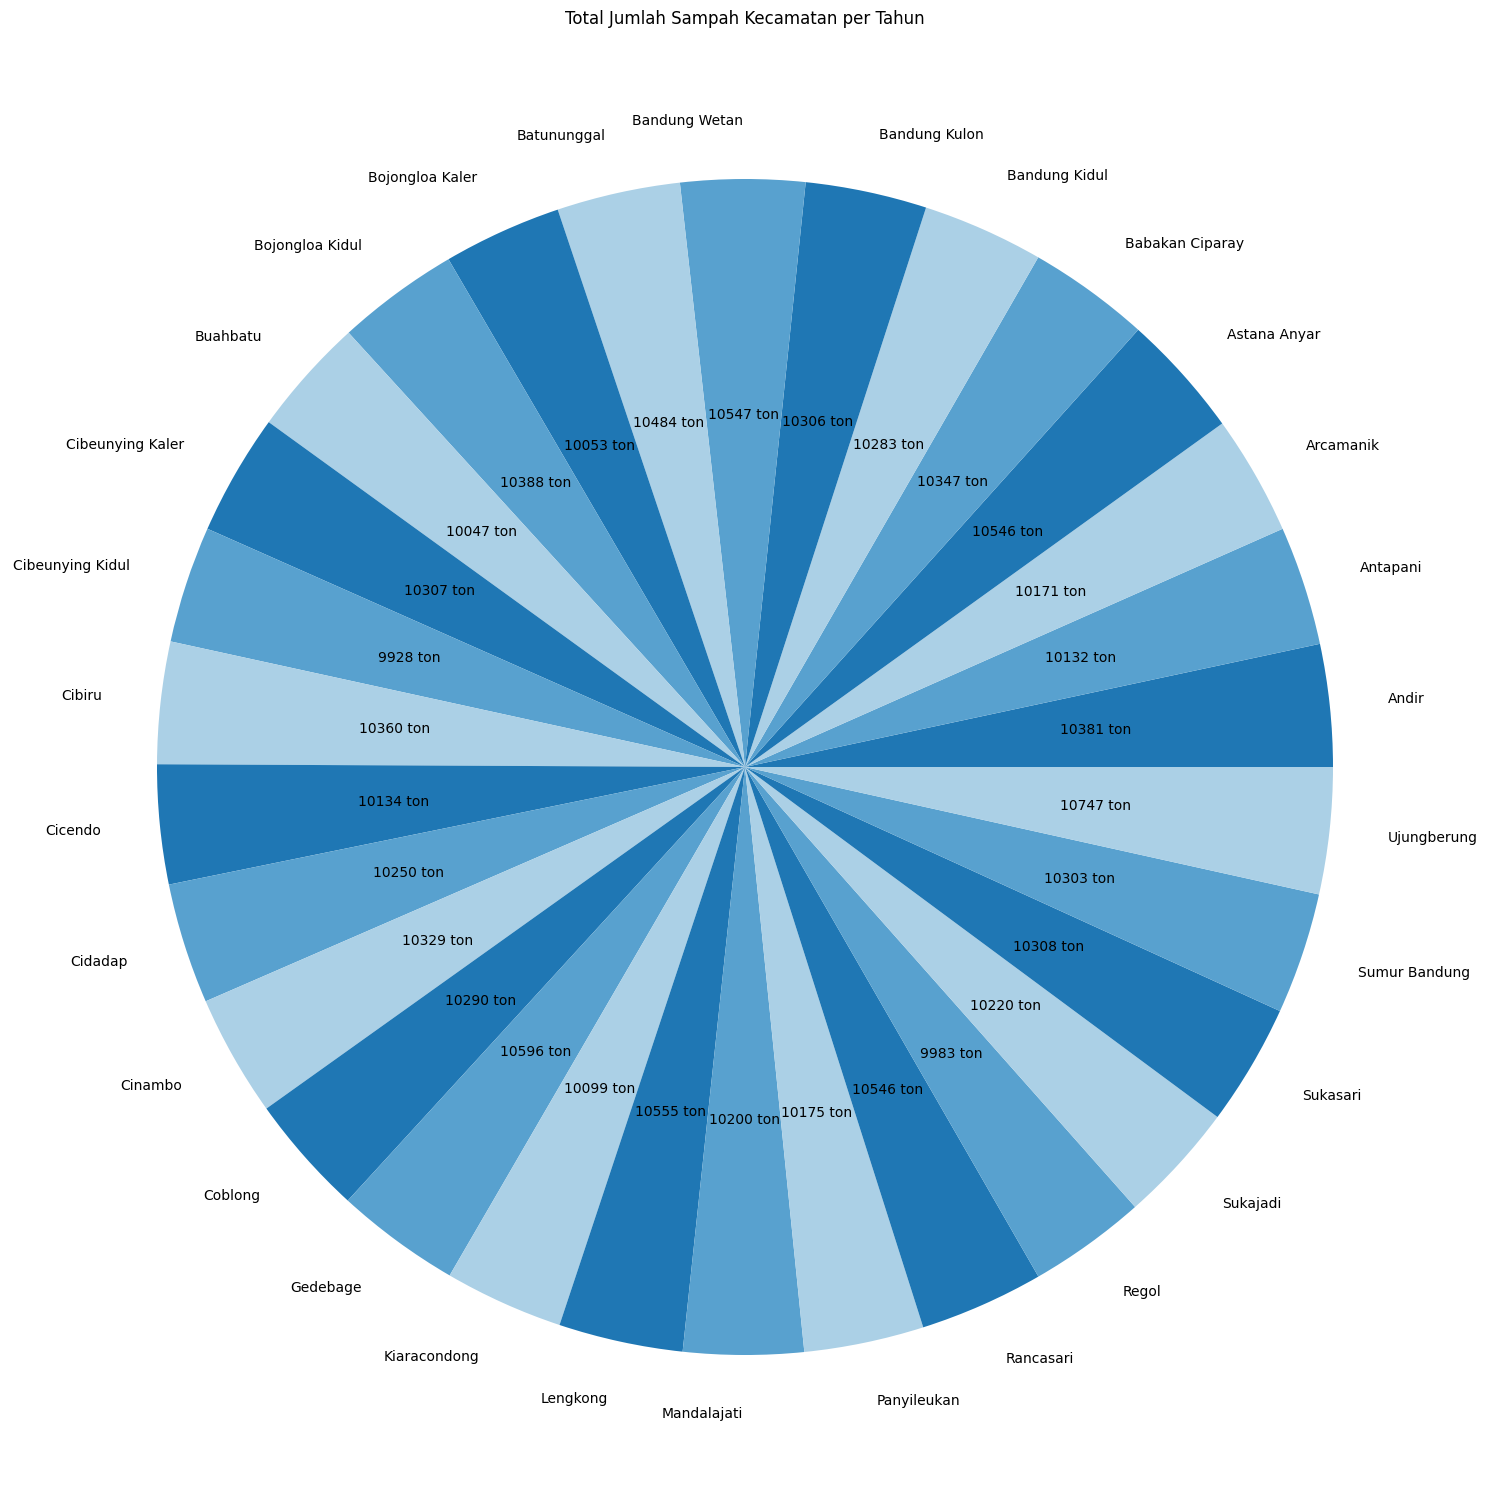

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, data_sampah adalah path ke file CSV
data_sampah = 'datasets/Dataset_dummy_v2.csv'

# Membaca data dari file CSV
total_sampah_kecamatan_per_tahun = pd.read_csv(data_sampah)

# Melakukan operasi groupby pada DataFrame yang telah dibaca
kecamatan_data = total_sampah_kecamatan_per_tahun.groupby('kecamatan')['jumlah_sampah'].sum()

# Plot pie chart
plt.figure(figsize=(15, 15))

def gajelas(pct):
    total = sum(kecamatan_data)
    val = int(round(pct * total / 100))
    return f'{val} ton'

plt.tight_layout(pad=2)
pie = plt.pie(kecamatan_data, labels=kecamatan_data.index, autopct=gajelas)
plt.title('Total Jumlah Sampah Kecamatan per Tahun')
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import *

# display(HTML('<style>.widget-button { border-radius: 40px; }</style>'))

button_sampah = widgets.Button(
    description='Open Datasets',
    disabled=False,
    button_style='info',
    tooltip='Open the Datasets',
    icon='database'
)

button_map = widgets.Button(
    description='Open Map',
    button_style='success',
    tooltip='Open the Map',
    icon='map'
)

button_bar = widgets.Button(
    description='Open Bar',
    button_style='warning',
    tooltip='Open the Bar',
    icon='bar-chart'
)

button_close = widgets.Button(
    description='Close',
    button_style='danger',
    tooltip='Close',
    icon='times'
)

output = widgets.Output()

def open_map(button_map):
    with output:
            clear_output()
            display(button_close,bandung_map)

def open_bar(button_bar):
    with output:
            clear_output()
            display(button_close)
            plt.show(pie)


def open_sampah(button_sampah):
    with output:
            clear_output()
            display(button_close,data_sampah)

def close(button_close):
    with output:
        clear_output()


button_map.on_click(open_map)
button_bar.on_click(open_bar)
button_sampah.on_click(open_sampah)
button_close.on_click(close)

display(button_map,button_bar,button_sampah,output)

Button(button_style='success', description='Open Map', icon='map', style=ButtonStyle(), tooltip='Open the Map'…

Button(button_style='warning', description='Open Bar', icon='bar-chart', style=ButtonStyle(), tooltip='Open th…

Button(button_style='info', description='Open Datasets', icon='database', style=ButtonStyle(), tooltip='Open t…

Output()